# Chapter 2: Supervised learning 

# You learn
* How to plot an image
* How to manipulate a grayscale image 
* How to use principal component and linear discriminant axes for data visualization
* How to use support vector machines 


We start with the well-known zip code example zip.train.gz

The data can be downloaded from the website of Elements of Statistical Learning (http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/) book. 
Extract the file and then give the file address to read the text "zip.train" file.

In [1]:
remove(list=ls())
zipdata <- as.matrix(read.table("../data/zip.train"))

In [3]:
dim(zipdata)

[1] 7291  257

The data contains $7291\times 257$ digit samples, first column is the storted digit and the remaining 256 is a $16 \times 16$ grayscale image.
Now we plot the first row of the data. The image plot of data is feasible using the image command in R.
Be careful as you need to restructure the data for each digit and put a vector of $1\times 256$ into a $16\times 16$ to visualize properly.


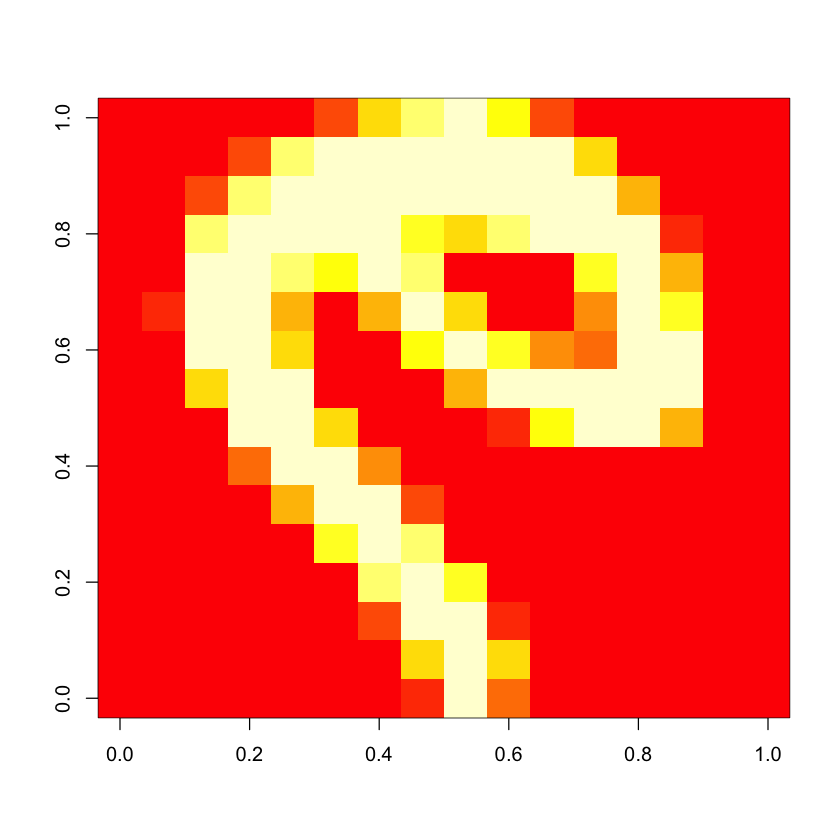

In [5]:
#zipdata[1,1:16]
#(matrix((zipdata[1,2:257]),nrow=16, ncol=16))

image((matrix((zipdata[1,2:257]),nrow=16, ncol=16)))


Seems the digit 6 is roatated 180 degrees. 

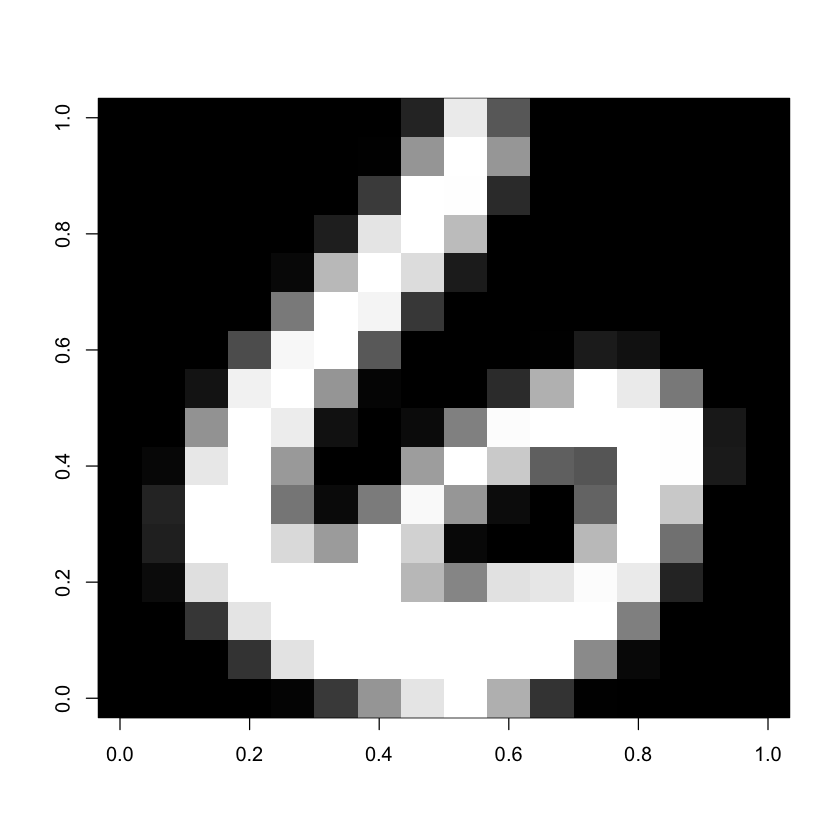

In [4]:
image((matrix((zipdata[1,2:257]),nrow=16, ncol=16))[,16:1],col = gray((0:255)/255))

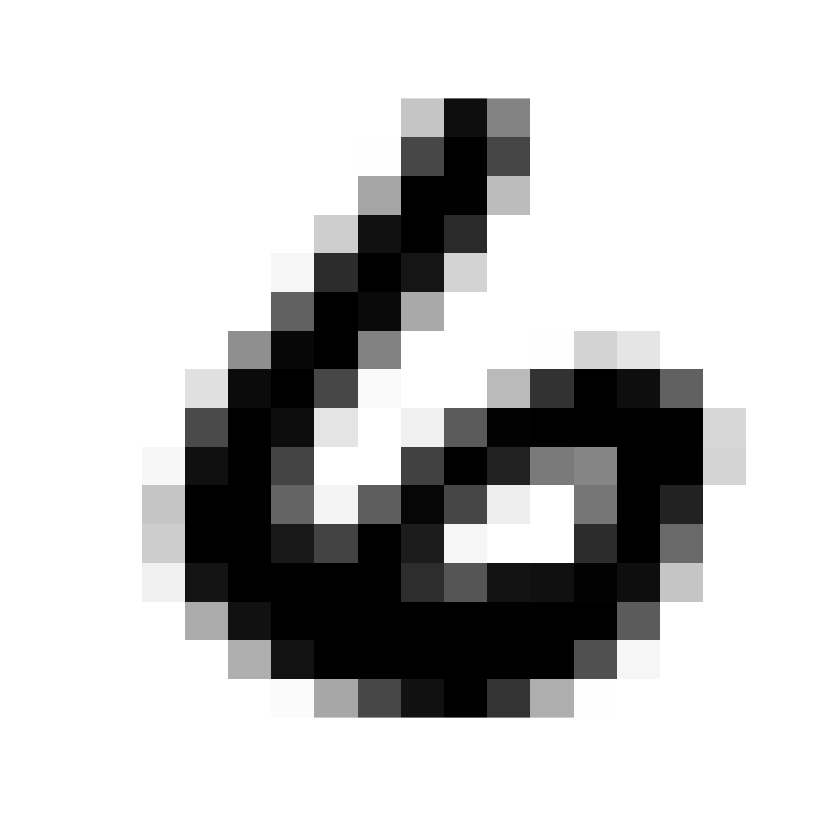

In [5]:
image((matrix(( - zipdata[1,2:257]), nrow=16, ncol=16))[,16:1], col = gray((0:255)/255), axes=FALSE)

# Stacking images
Create 2 datasets one for the digit 3 and another for the digit 8. 
Then we plot 10 random samples of each dataset.

In [6]:
zipdata3 <- zipdata[zipdata[,1]==3,]
zipdata8 <- zipdata[zipdata[,1]==8,]
nrow(zipdata3)
set.seed(10)
random3 <- sample(1:nrow(zipdata3),size=10)

[1] 658

In [7]:
zipdata3stack <- matrix(zipdata3[random3[1],2:257], 16, 16)[,16:1]
dim(zipdata3stack)
for (i in 2:length(random3))
    {
    zipdata3stack <- cbind(zipdata3stack, matrix(zipdata3[random3[i],2:257], 16, 16)[,16:1])
    }


[1] 16 16

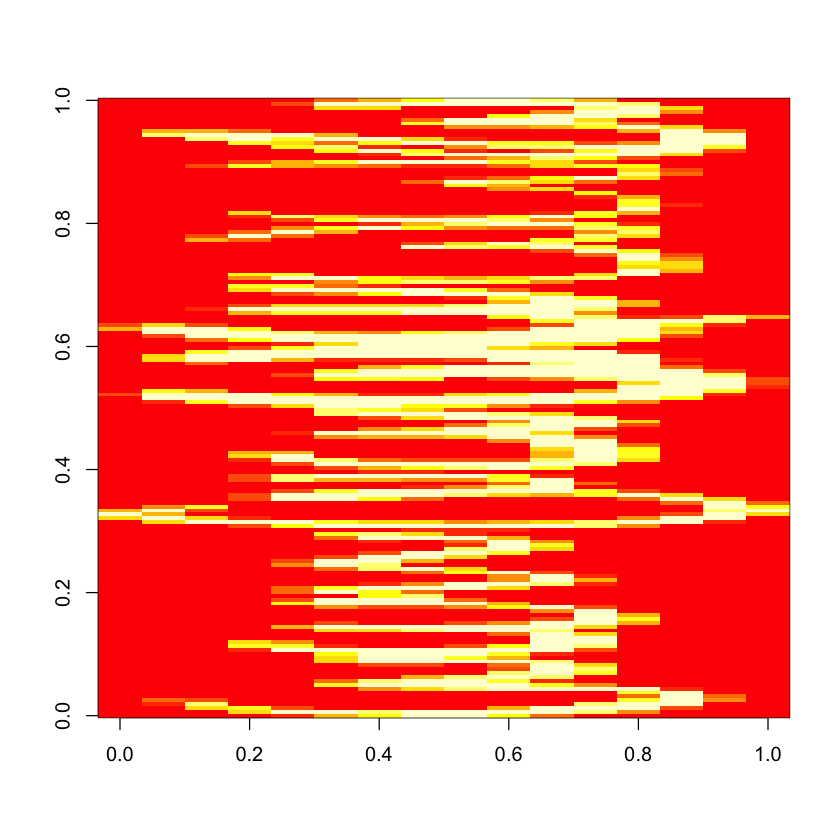

In [8]:
image(zipdata3stack)

# Margin matters
The margines can help to adjust the aspect ratio.

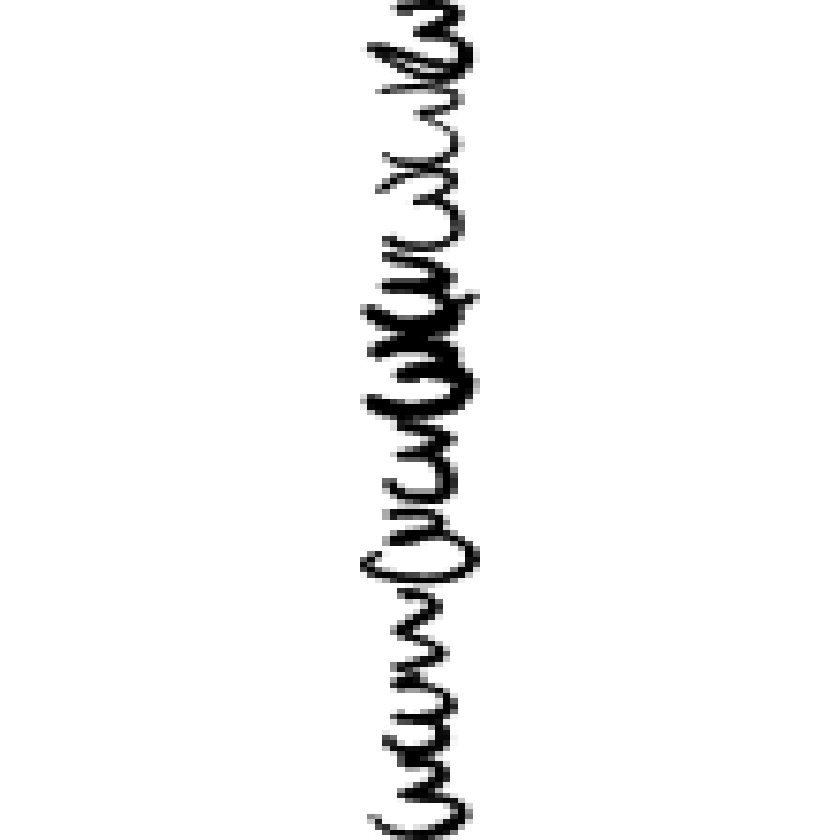

In [9]:
par(mar=c(0,15,0,15))
image(-zipdata3stack, col= gray((0:255)/255),axes=FALSE)

## Exercise
Plot 10 random samples of the digit 8 in one line.

In [10]:
set.seed(10)
random8 <- sample(1:nrow(zipdata8),size=10)

zipdata8stack <- matrix(zipdata8[random3[1],2:257], 16, 16)[,16:1]
dim(zipdata8stack)
for (i in 2:length(random8))
    {
    zipdata8stack <- rbind(zipdata8stack, matrix(zipdata8[random8[i],2:257], 16, 16)[,16:1])
    }


[1] 16 16

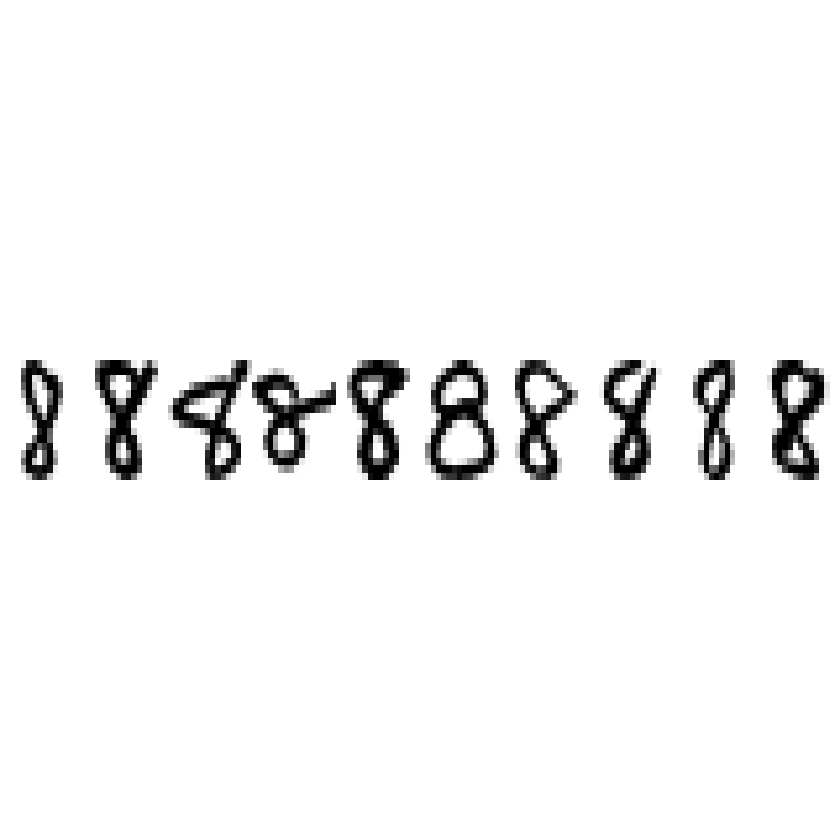

In [11]:
par(mar=c(15,0,15,0))
image(-zipdata8stack, col= gray((0:255)/255),axes=FALSE)


# Principal components projection (PCA)
The PCA has many different interpretations. It is often used as a visualization or a dimension reduction method for multivariate data. The pricipal components computes a linear subspace of data that maximizes the variance.
It is not dofficult to see that finding the maximizing direction coincides with eigen value egen vector decomposition. The maximum number of projections is the maximum number of features.

Now we intend to visualize the 256 dimenion of the zip data into two dimension.  Then compare two different dimension reduction techniques on all 10 digits data: the principal components versus linear discriminant axes. 
The linear disciriminant can be used as a visiulization tool or as a classification tool.

We start with the principal components.

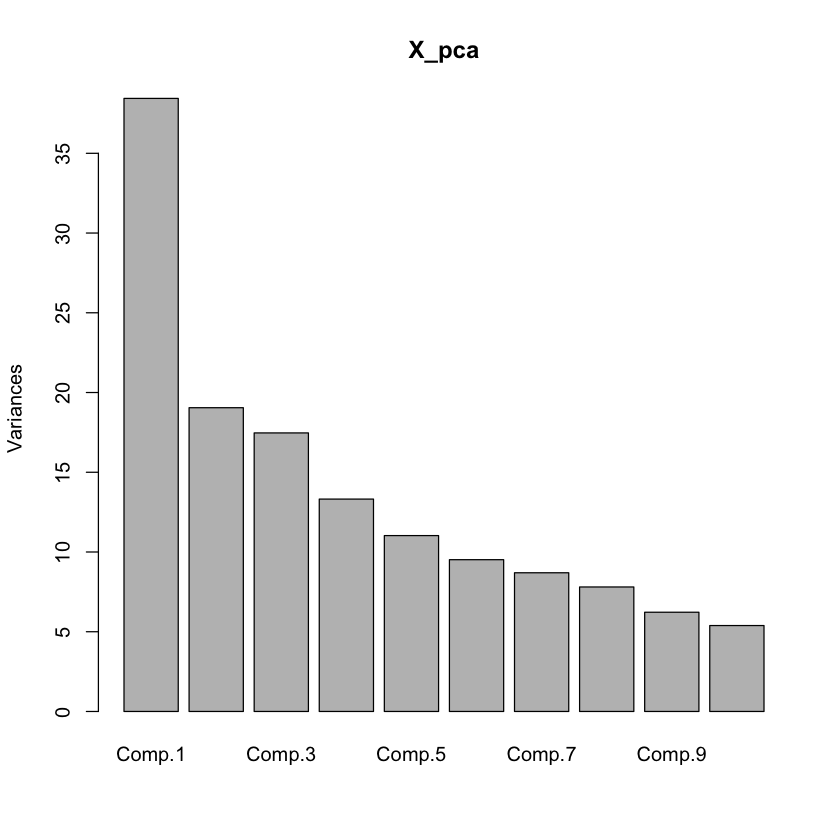

In [12]:
X <- as.data.frame(zipdata[,2:257])
y <- zipdata[,1]

X_pca<- princomp(X,2)
X_pred <- predict(X_pca)
plot(X_pca)

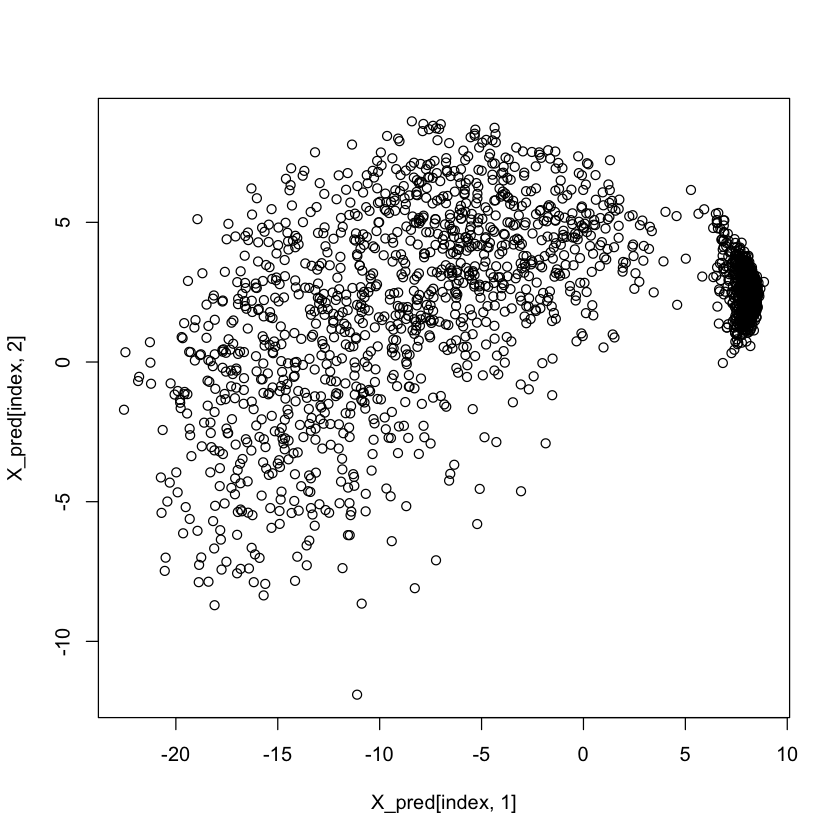

In [13]:
index <- (y==1) | (y==0)
plot( X_pred[index,1], X_pred[index,2])


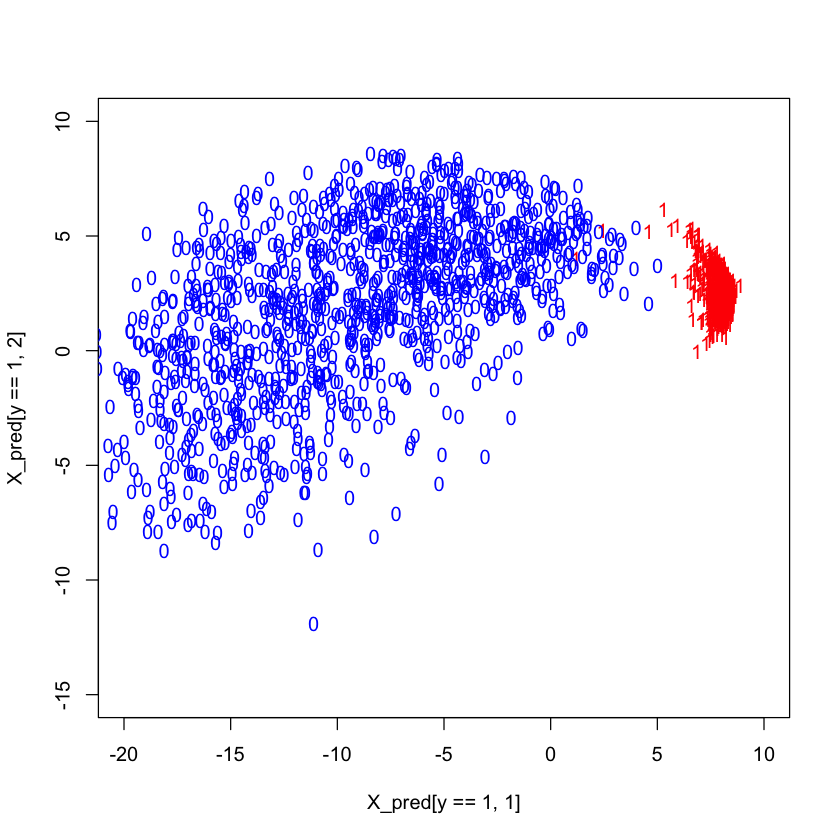

In [14]:
plot( X_pred[y==1,1], X_pred[y==1,2], pch="1",col="red",xlim=c(-20,10), ylim=c(-15,10))
points( X_pred[y==0,1], X_pred[y==0,2], pch="0", col="blue")

# Exercise
Visualize the digit 3 and 8 and see they are much less separable.
Here you learn how to adjust for transparency

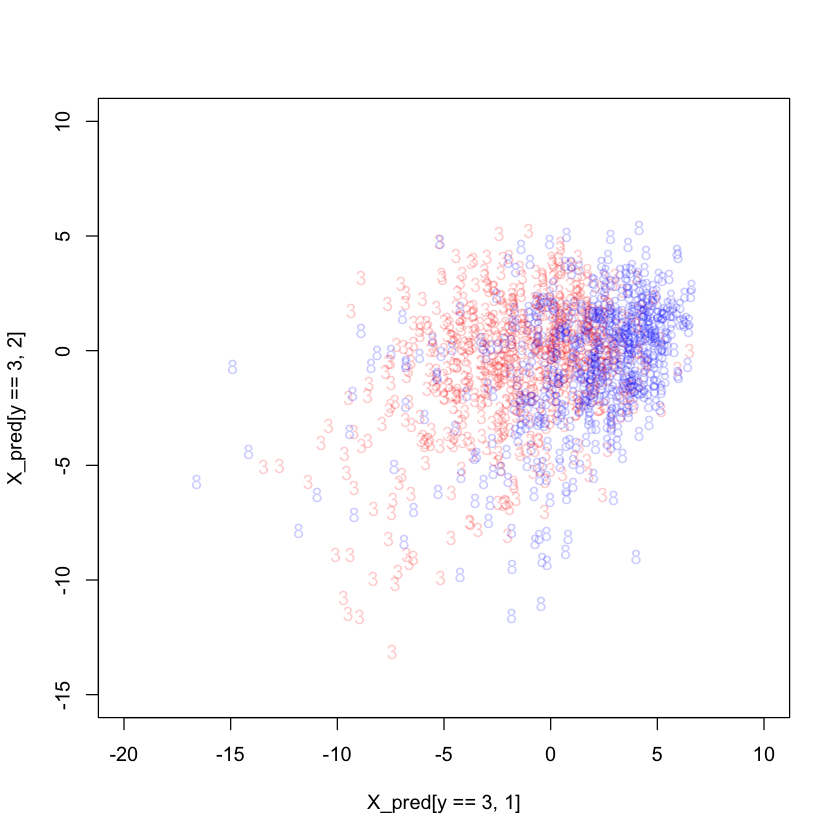

In [15]:
index <- (y==3) | (y==8)
plot( X_pred[y==3,1], X_pred[y==3,2], pch="3",col=adjustcolor("red", alpha=0.2),xlim=c(-20,10), ylim=c(-15,10))
points( X_pred[y==8,1], X_pred[y==8,2], pch="8", col=adjustcolor("blue", alpha=0.2))

# Linear discriminant projection
The linear discriminant projection finds a linear combination of the attributes so that they are the most separable possible. It can be shown that the principal component projection is a special case of the linear discriminant projection. For the linear discriminant you require a classification vector. The number of projections in lindear discriminant is maximum the number of class -1.

In [16]:
require(MASS)
xy <- as.data.frame(zipdata)
colnames(xy) <- c("digit",paste("pixel_",1:256,sep=""))
xy$digit <- as.factor(xy$digit)
xy_lda <- lda(digit~.,data=xy)
xy_pred <- predict(xy_lda)$x


Loading required package: MASS


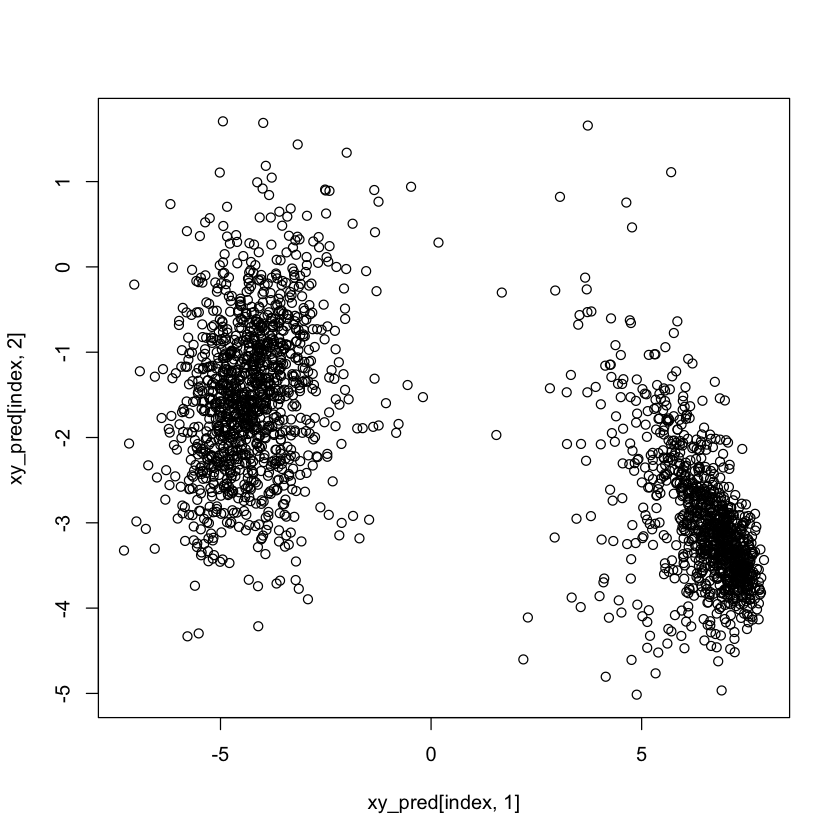

In [17]:
index <- (y==1) | (y==0)
plot( xy_pred[index,1], xy_pred[index,2])

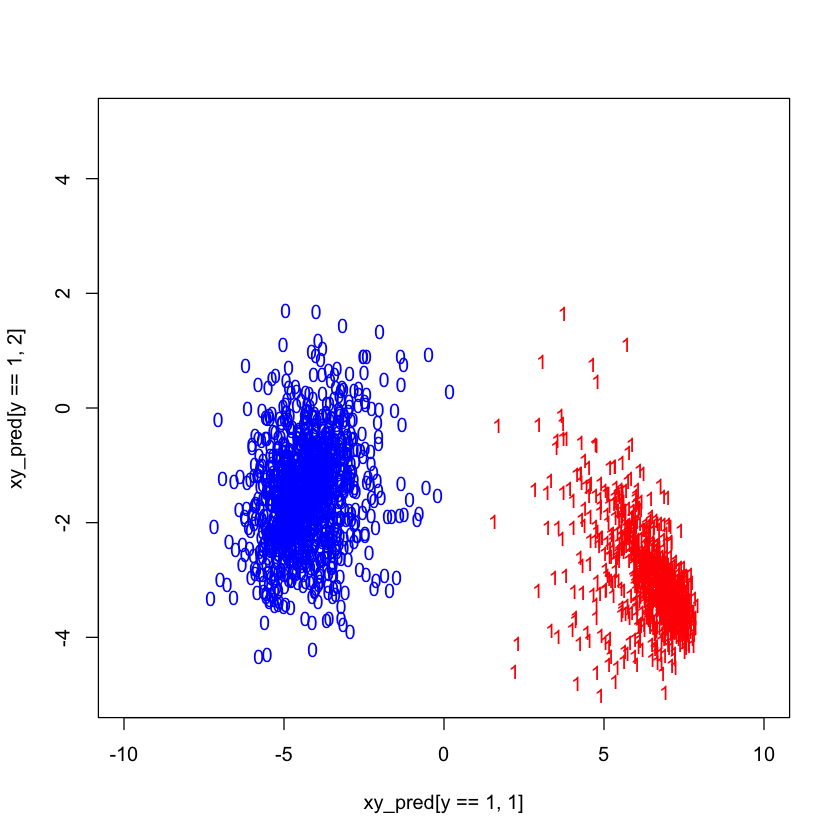

In [18]:
plot( xy_pred[y==1,1], xy_pred[y==1,2], pch="1",col="red",xlim=c(-10,10), ylim=c(-5,5))
points( xy_pred[y==0,1], xy_pred[y==0,2], pch="0", col="blue")

# 3D scatter plot
Now lets try 3D plots. In order to see the plot in a new window and rotate the plot using your trackpad or mouse you must use the "rgl" package. Here we use a simpler version from the scatterplot3d package.Beware that if you use non-standard packages, the behaviour of the package my be non-standard as well. 


In [19]:
library(scatterplot3d) 
s<-scatterplot3d( xy_pred[y==1,1], xy_pred[y==1,2], xy_pred[y==1,3],color="red", pch="1",xlim=c(-10,10), ylim=c(-10,10),
                zlim=c(-10,10))
s$points3d( xy_pred[y==0,1], xy_pred[y==0,2], xy_pred[y==0,3],col="blue", pch="0")

ERROR: Error in library(scatterplot3d): there is no package called ‘scatterplot3d’


ERROR: Error in eval(expr, envir, enclos): could not find function "scatterplot3d"


ERROR: Error in eval(expr, envir, enclos): object 's' not found


# Support vector machines (SVM)

The linear support vector machine classifier is somehow a linear regression but instead of the least squares objective 

$\sum_{i=1}^n (y_i-x_i^\top \beta)^2$ 

it minimizes the hinge loss


$\sum_{i=1}^n (1-y_i x_i^\top \beta)_+$.
Here $y_i$ is the class indicator $(-1,+1)$, and $(.)_+$ is the positive part function
$x_+=\left\{ 
\begin{array}{c c} 
0 & \textrm{if $x<0$}\\
x & \textrm{if $x\geq 0$}
\end{array}
\right.$

Kernel support vetors is a sort of generalization of line to polynomial and other linear spaces defined by a generalized dot product. Such smooth linear spaces is called reproducing kernel Hilbert spaces. If the dot product is the $x.y=\sum_{i=1}^n x_i y_i$ a support vector bahaves as a linear classifier, very similar to threshold linear regression.


SVMs were developed for binary classification. Multi-class classification are reduced to binary using one versus the others. This reduction may produce some abigious regions, i.e. there is no signle label for some regions.



In [20]:
install.packages("mylibrary")
require(e1071)

Loading required package: e1071


The R interface to libsvm C++ library is in R package e1071.
Authors belonged to Vienna university of technology. Institut für Statistik und Wahrscheinlichkeitstheorie their statistic department has code :e107 and e1071 belongs to computational intelligence within that department.

Remember that data xy was the zipcode data in the dataframe format.
Now suppose we want to classify digit 4 from digit 9. Let's use the first two principal components of the data instead of the orginal pixels.


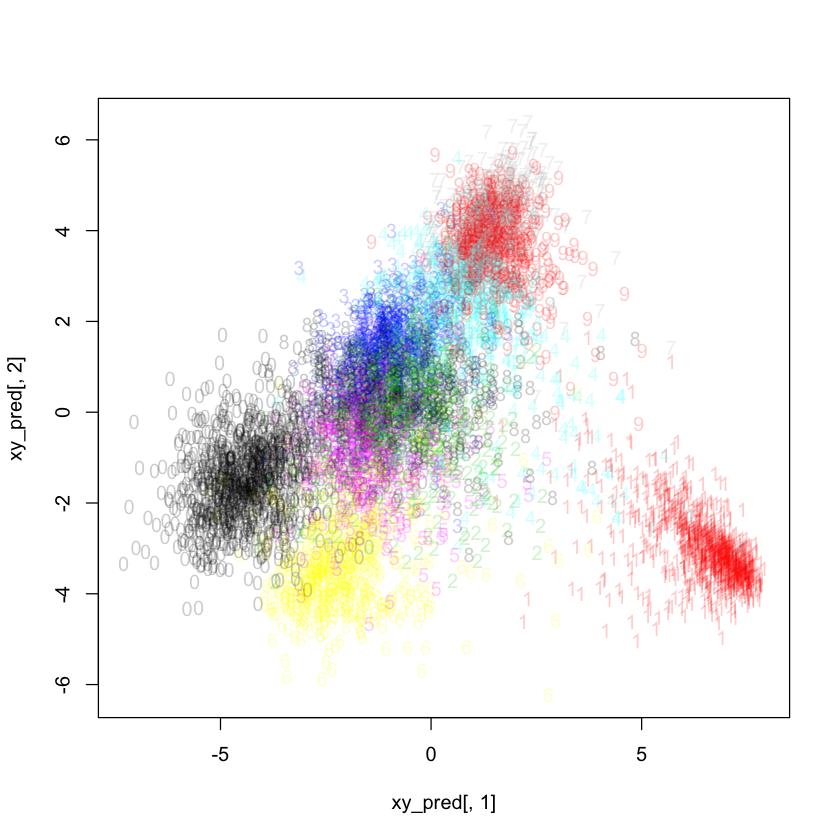

In [21]:
plot(xy_pred[,1],xy_pred[,2],pch=paste(round(y)),col=adjustcolor((round(y+1)), alpha=0.2))


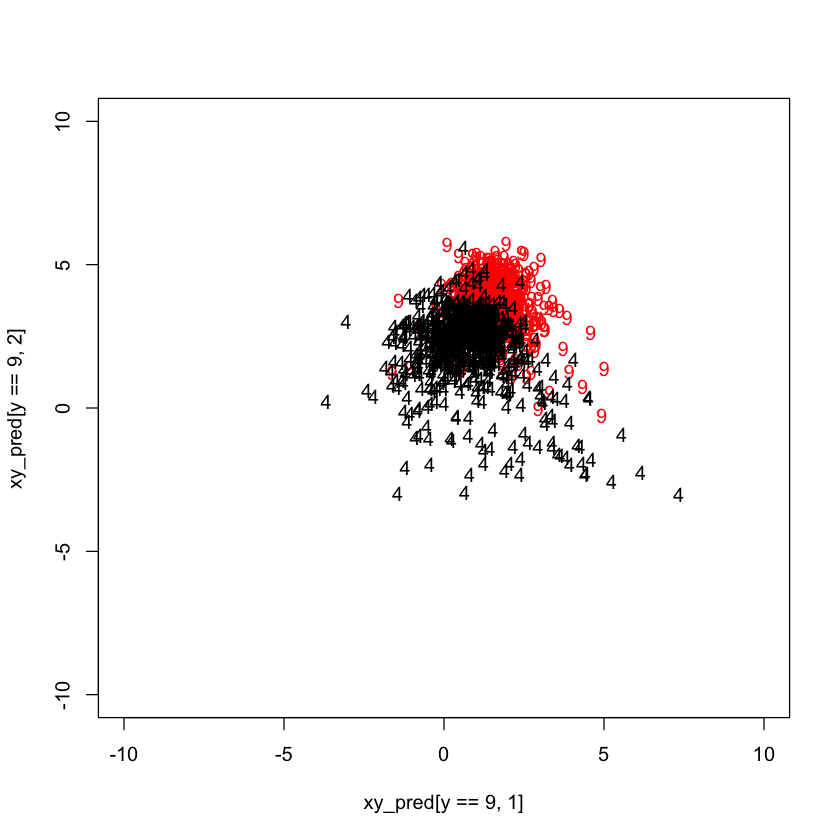

In [22]:
plot(xy_pred[y==9,1],xy_pred[y==9,2],pch="9",col=2,xlim=c(-10,10),ylim=c(-10,10))
points(xy_pred[y==4,1],xy_pred[y==4,2],pch="4",col=1)

First make the appropriate data frame to fit the svm.



In [23]:
zip_pc <- rbind(xy_pred[y==9,1:2],xy_pred[y==4,1:2])
dim(zip_pc)

zip_pc <- cbind(rep(c(9,4),c(sum(y==9),sum(y==4))), zip_pc)
zip_pc <- as.data.frame(zip_pc)
colnames(zip_pc) <- c("digit", "pc1", "pc2")
zip_pc$digit <- as.factor(zip_pc$digit) 

[1] 1296    2

In [24]:
svm.model <- svm (digit~., data=zip_pc, kernel="linear")

Now lets build the test set.

In [25]:
n=50
zip_pc_test <- expand.grid(seq(-10,10,length=n),seq(-10,10,length=n))
colnames(zip_pc_test) <- c("pc1","pc2")

In [26]:
svm.pred <- predict(svm.model, zip_pc_test)

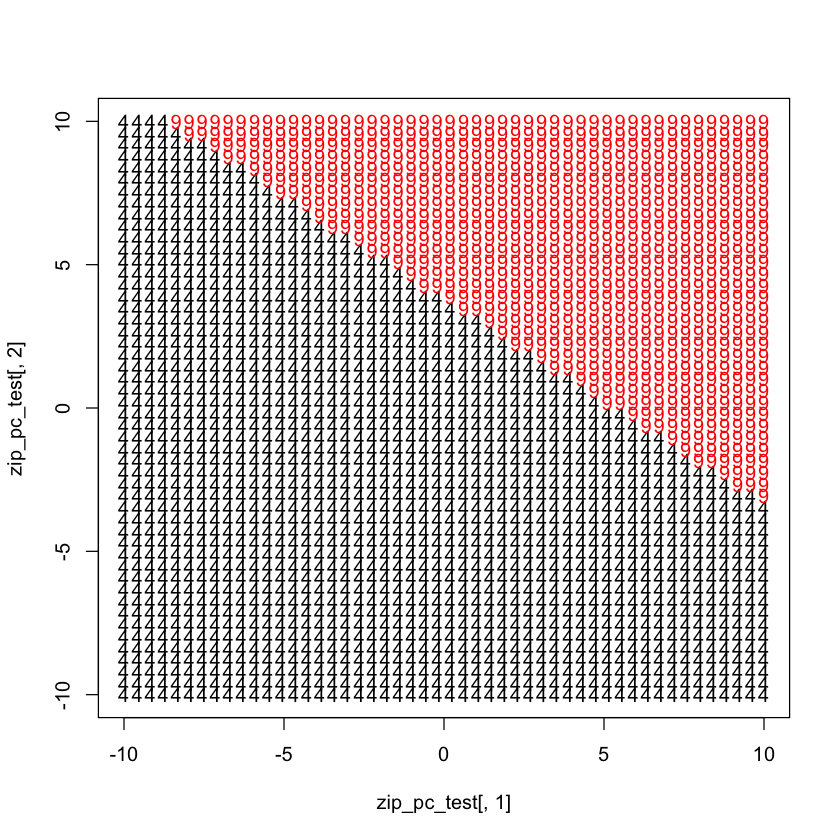

In [27]:
plot(zip_pc_test[,1],zip_pc_test[,2], col=svm.pred,pch=paste(svm.pred))

# Radial Basis

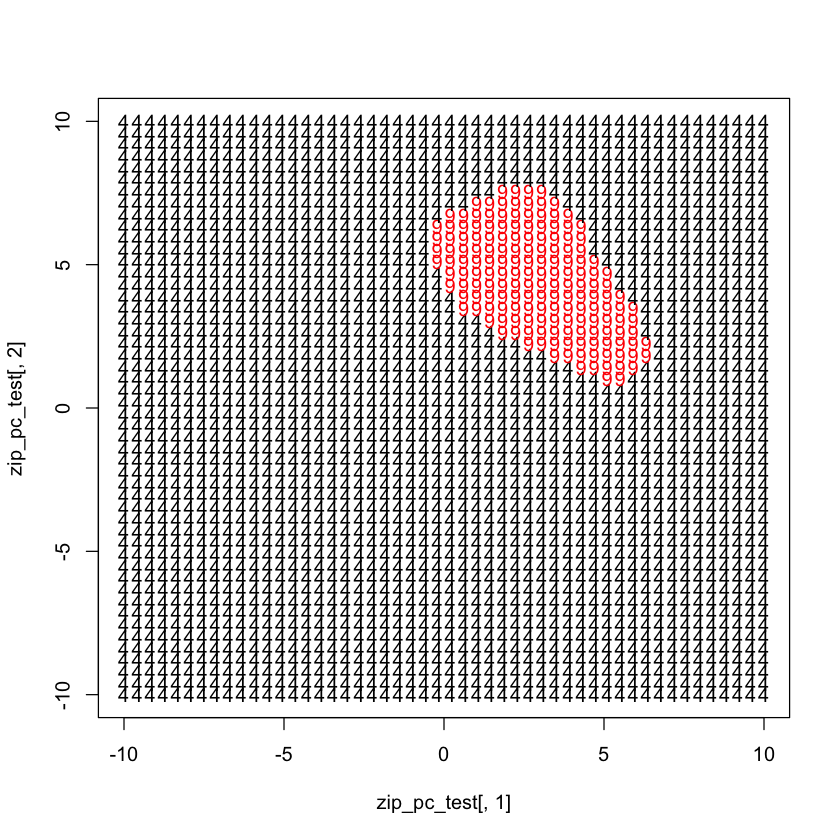

In [28]:
svm.model <- svm (digit~., data=zip_pc, kernel="radial")
svm.pred <- predict(svm.model, zip_pc_test)
plot(zip_pc_test[,1],zip_pc_test[,2], col=svm.pred,pch=paste(svm.pred))

# Exercise
Make the support vector machine on the ziptrain, and test it on ziptest data for all 10 digits.

    